# Contents
[Create dummy data](#Create-dummy-data)<br>
[Polynomial Features](#Polynomial-Features)<br>
[Decision Tree Regression](#Decision-Tree-Regression)<br>
[Random Forest Regressor](#Random-Forest-Regressor)<br>
[AdaBoost](#AdaBoost)<br>
<br>
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
%matplotlib inline

# Create dummy data

In [3]:
np.random.seed(42)

In [4]:
# create a nice sigmoid curve
X = np.linspace(0.001,10,100)
y = 5 / (1 + np.exp(-X+5)) + np.random.normal(0, 0.3, size=100)

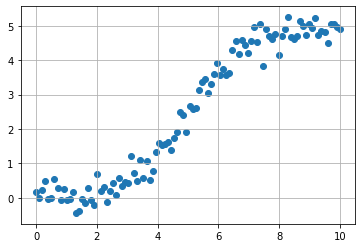

In [5]:
plt.scatter(X, y)
plt.grid()
plt.show()

# Polynomial Features

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

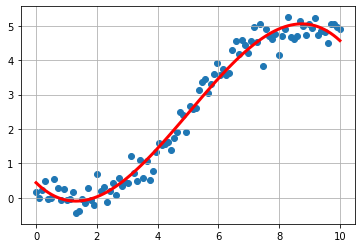

In [7]:
poly_model = PolynomialFeatures(degree=3)
# create [X^0, X^1, X^2, X^3] as features out of X
X_poly = poly_model.fit_transform(X.reshape(-1,1))
lr_model = LinearRegression()
lr_model.fit(X_poly, y.reshape(-1,1))

plt.scatter(X, y)
plt.plot(X, lr_model.predict(X_poly), linewidth=3, c='r')
plt.grid()
plt.show()

# Decision Tree Regression

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
tree_model = DecisionTreeRegressor(max_depth=3)

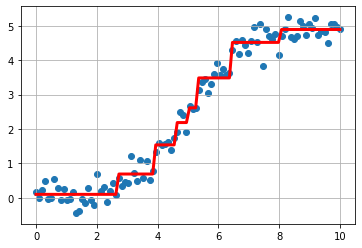

In [10]:
tree_model.fit(X.reshape(-1,1), y.reshape(-1,1))

plt.scatter(X, y)
plt.plot(X, tree_model.predict(X.reshape(-1,1)), linewidth=3, c='r')
plt.grid()
plt.show()

## Try on multiple features

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), 
                                    df['target'], test_size=0.3, random_state=42)

In [13]:
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train, y_train)

print(mean_squared_error(y_train, tree_model.predict(X_train)))
print(mean_squared_error(y_test, tree_model.predict(X_test)))

15.367966101816167
16.928244075591266


## Feature importance from decision tree

In [14]:
importances = pd.DataFrame(tree_model.feature_importances_, X_train.columns, 
             columns=['importance']).sort_values(by='importance', ascending=False)
importances

,importance
RM,0.644203
LSTAT,0.203562
DIS,0.104239
CRIM,0.047995
ZN,0.000000
INDUS,0.000000
CHAS,0.000000
NOX,0.000000
AGE,0.000000
RAD,0.000000


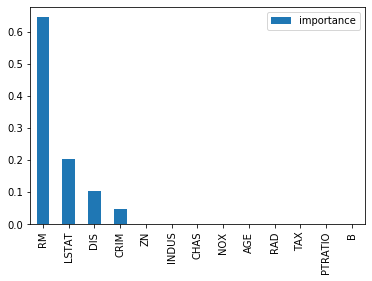

In [15]:
importances.plot(kind='bar')
plt.show()

# Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor 

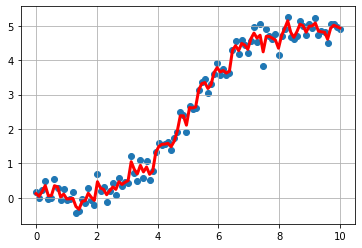

In [17]:
random_tree = RandomForestRegressor(n_estimators=100)
random_tree.fit(X.reshape(-1,1), y)

plt.scatter(X, y)
plt.plot(X, random_tree.predict(X.reshape(-1,1)), linewidth=3, c='r')
plt.grid()
plt.show()

## Try on multiple features

In [18]:
random_tree = RandomForestRegressor(n_estimators=100, min_samples_split=6)
random_tree.fit(X_train, y_train)

print(mean_squared_error(y_train, random_tree.predict(X_train)))
print(mean_squared_error(y_test, random_tree.predict(X_test)))

2.637763423671589
9.399560517859074


## Feature importance from random forest

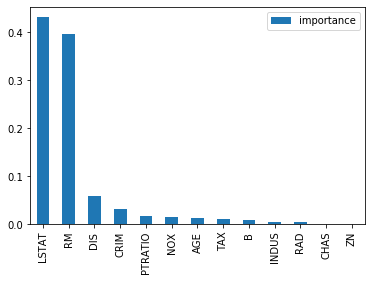

In [19]:
importances = pd.DataFrame(random_tree.feature_importances_, X_train.columns, 
             columns=['importance']).sort_values(by='importance', ascending=False)
importances.plot(kind='bar')
plt.show()

# AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostRegressor

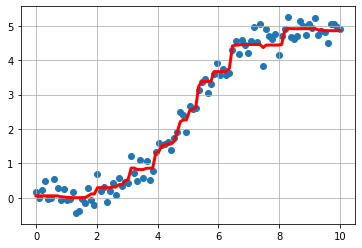

In [21]:
ada_tree = AdaBoostRegressor()
ada_tree.fit(X.reshape(-1,1), y)

plt.scatter(X, y)
plt.plot(X, ada_tree.predict(X.reshape(-1,1)), linewidth=3, c='r')
plt.grid()
plt.show()

## Try on multiple features

In [22]:
ada_tree = AdaBoostRegressor()
ada_tree.fit(X_train, y_train)

print(mean_squared_error(y_train, ada_tree.predict(X_train)))
print(mean_squared_error(y_test, ada_tree.predict(X_test)))

7.943158702222164
16.200014076230175


## Feature importance from random forest

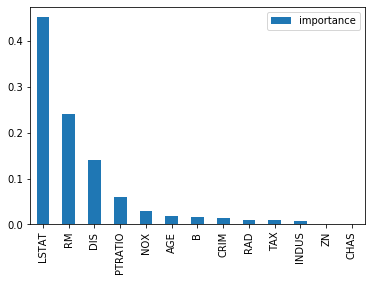

In [23]:
importances = pd.DataFrame(ada_tree.feature_importances_, X_train.columns, 
             columns=['importance']).sort_values(by='importance', ascending=False)
importances.plot(kind='bar')
plt.show()